In [3]:
import numpy as np
import pandas as pd
import time

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap.umap_ as umap
# #LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [81]:
    train = pd.read_csv('digit_recognizer_train.csv')
    train = train[train['label'] > 0]
    train = train[train['label'] < 8]
    train = train.sample(n=3000)

    target_name = 'label'
    TSNE_component = 50

    # Setting the label and the feature columns
    y = train.loc[:,'label'].values
    x = train.loc[:,'pixel0':].values

    ## Standardizing the data
    x = StandardScaler().fit_transform(x)

In [82]:
kmeans = KMeans(
    init="random",
    n_clusters=7,
    n_init=10,
    max_iter=300,
)

cluster_result = kmeans.fit(x)
result_label = (cluster_result.labels_).tolist()

In [83]:
def gen_plot(component1, component2, plt_title, y_name):

    x = component1
    y = component2
    
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, c=[sns.color_palette()[i] for i in result_label])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('{} Projection'.format(plt_title), fontsize=24)

In [84]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

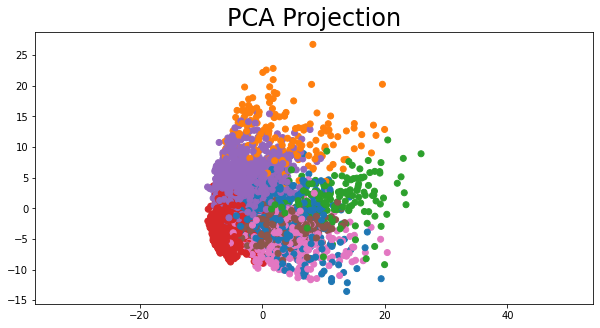

In [85]:
gen_plot(principalComponents[:, 0],principalComponents[:, 1], "PCA", target_name)

In [86]:
cluster_result = kmeans.fit(principalComponents)
result_label = (cluster_result.labels_).tolist()

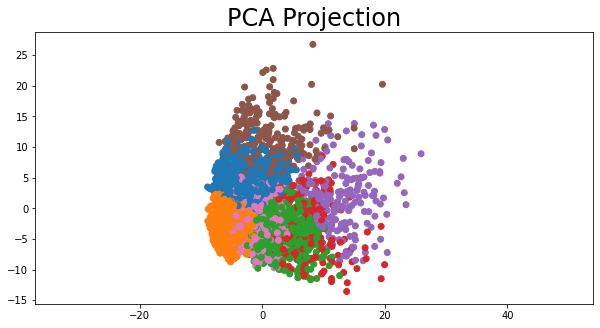

In [87]:
gen_plot(principalComponents[:, 0],principalComponents[:, 1], "PCA", target_name)